In [1]:
import pandas 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [2]:
df = pandas.read_csv('insurance_claims.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [6]:
df.policy_state.unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [7]:
df.groupby('policy_state').size()

policy_state
IL    338
IN    310
OH    352
dtype: int64

In [8]:
Y = df['fraud_reported']=='Y'
df.drop(columns=['_c39','fraud_reported'],inplace=True)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,1,2,YES,71610,6510,13020,52080,Saab,92x,2004
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,0,?,5070,780,780,3510,Mercedes,E400,2007
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,0,1,NO,6500,1300,650,4550,Accura,RSX,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,0,1,?,87200,17440,8720,61040,Honda,Accord,2006
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,0,1,YES,46980,5220,5220,36540,Audi,A5,1998


In [9]:
Y.mean()

0.247

In [10]:
df.columns.sort_values().values

array(['age', 'authorities_contacted', 'auto_make', 'auto_model',
       'auto_year', 'bodily_injuries', 'capital-gains', 'capital-loss',
       'collision_type', 'incident_city', 'incident_date',
       'incident_hour_of_the_day', 'incident_location',
       'incident_severity', 'incident_state', 'incident_type',
       'injury_claim', 'insured_education_level', 'insured_hobbies',
       'insured_occupation', 'insured_relationship', 'insured_sex',
       'insured_zip', 'months_as_customer', 'number_of_vehicles_involved',
       'police_report_available', 'policy_annual_premium',
       'policy_bind_date', 'policy_csl', 'policy_deductable',
       'policy_number', 'policy_state', 'property_claim',
       'property_damage', 'total_claim_amount', 'umbrella_limit',
       'vehicle_claim', 'witnesses'], dtype=object)

In [11]:
visualize_cols = ['months_as_customer','age','policy_deductable','policy_annual_premium','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim','witnesses']



/Users/samaralruwaili/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/samaralruwaili/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/samaralruwaili/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

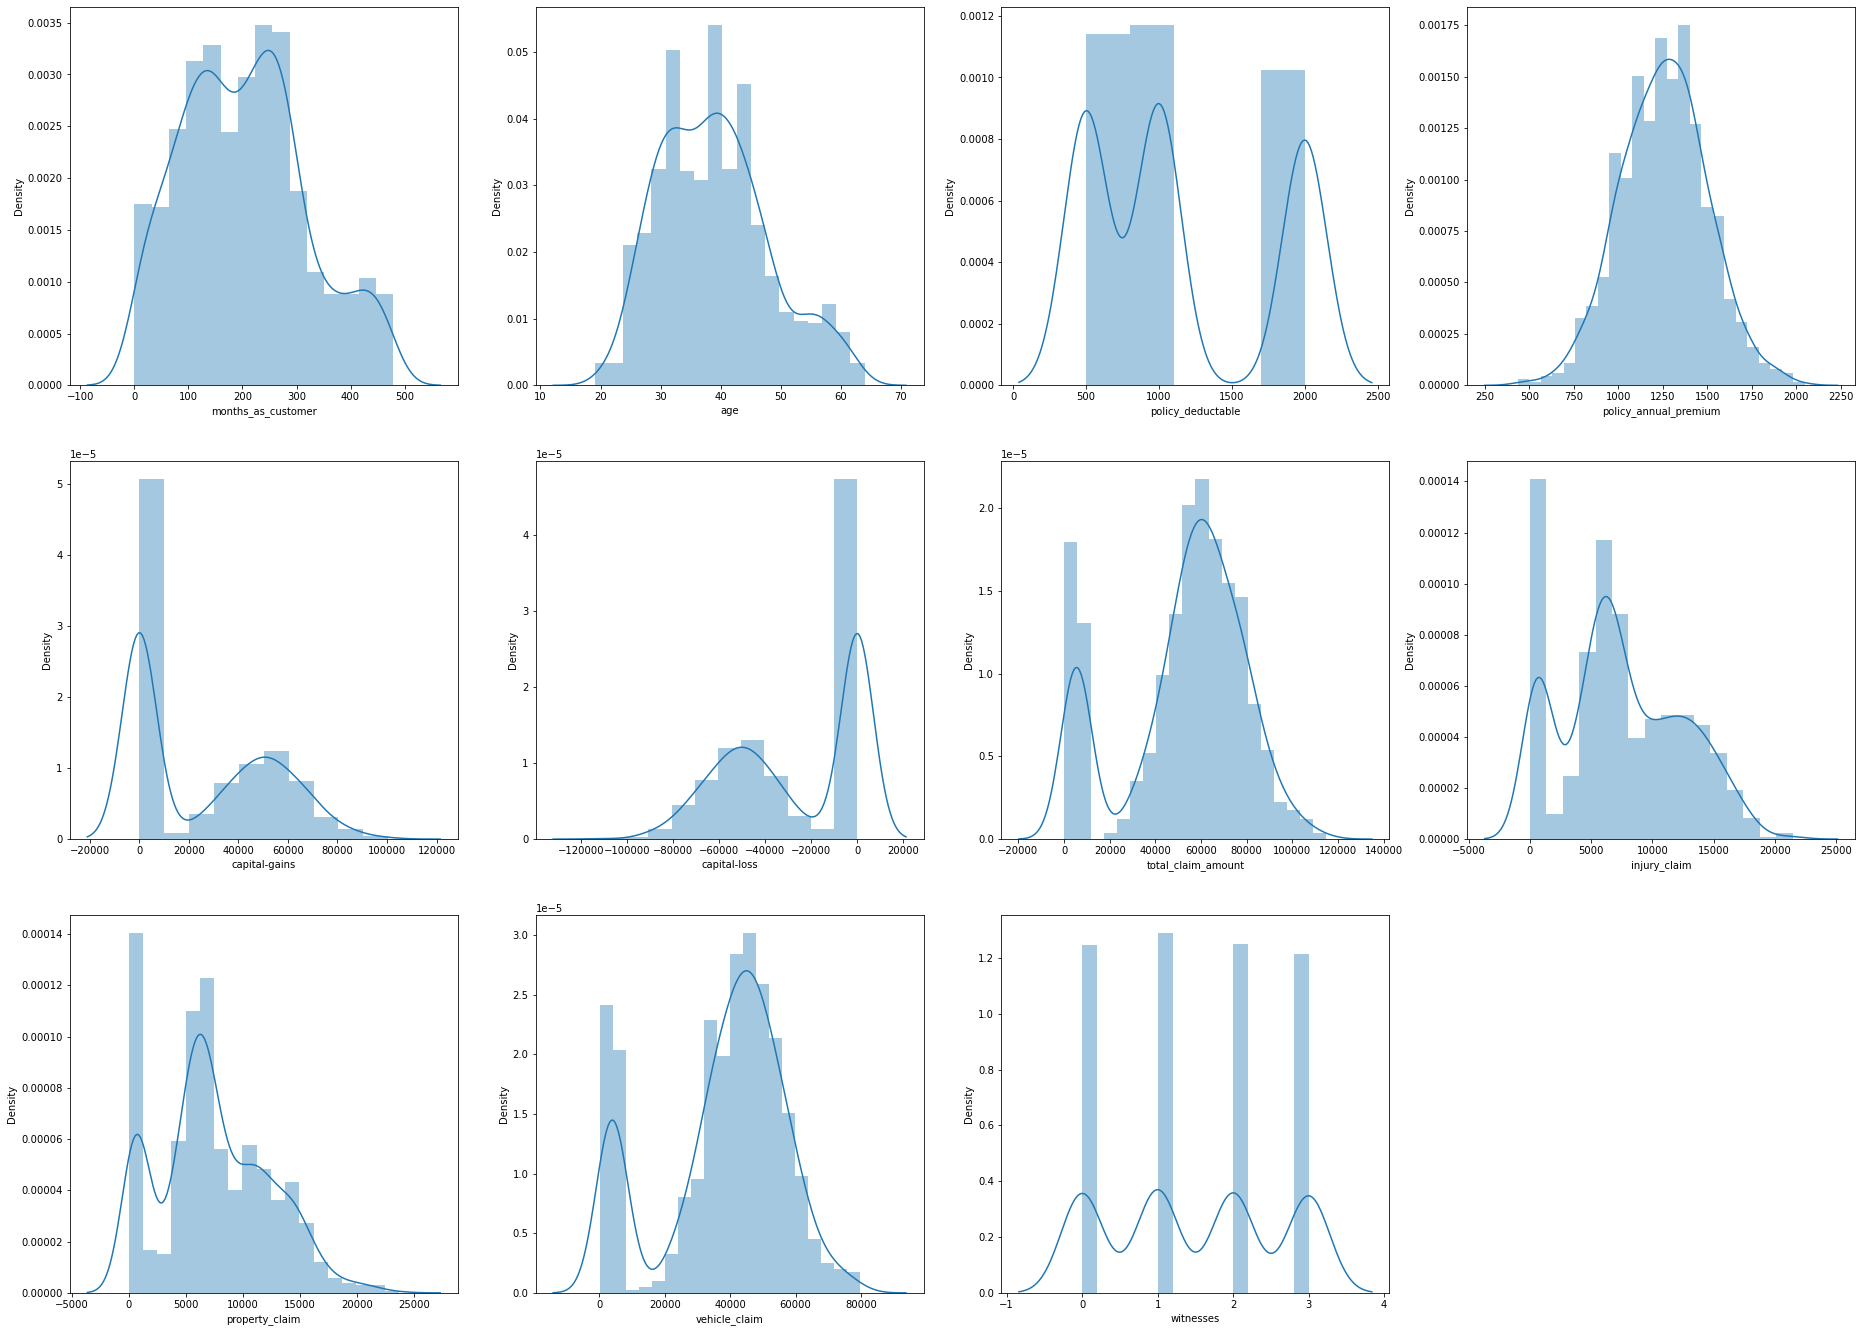

In [12]:
plt.figure(figsize=(32,32))

for i in range(len(visualize_cols)):
    plt.subplot(4,4,i+1)
    sns.distplot(df[visualize_cols[i]])
plt.show()

<AxesSubplot:xlabel='age', ylabel='months_as_customer'>

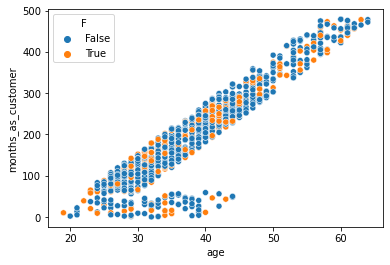

In [13]:
tdf = df.copy()
tdf['F']=Y
sns.scatterplot(x='age',y='months_as_customer',hue='F',data=tdf)

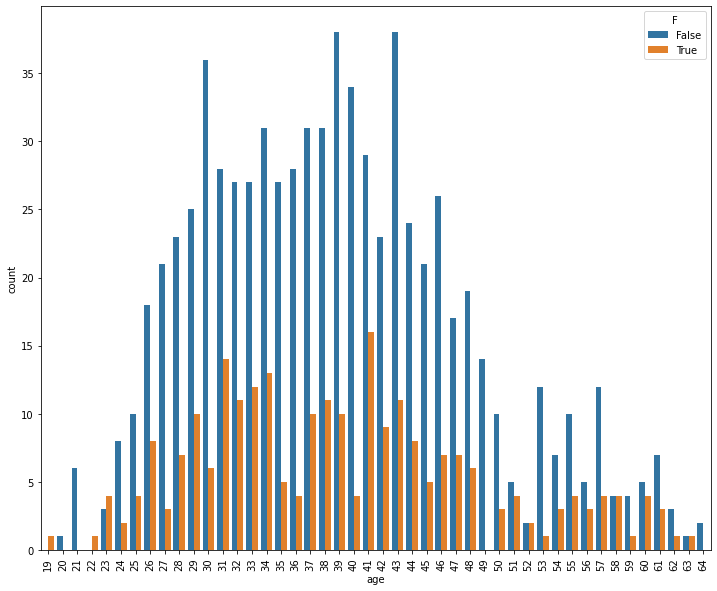

In [14]:
plt.figure(figsize=(12,10))
sns.countplot(x='age',hue='F',data=tdf)
plt.xticks(rotation=90)
plt.show()

In [15]:
fraud_ex_df = tdf[tdf['F']==True]

fraud_ex_df


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,F
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,True
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,True
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,True
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,True
14,180,38,644081,1998-12-28,OH,250/500,2000,1301.13,0,476685,...,2,YES,46200,4200,8400,33600,Dodge,Neon,2003,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,234,41,291006,1990-05-16,IN,100/300,500,951.56,0,455426,...,1,?,98280,15120,7560,75600,Chevrolet,Tahoe,2007,True
977,266,42,929306,2003-03-06,IN,100/300,500,1093.83,4000000,468454,...,1,NO,53280,4440,8880,39960,Suburu,Impreza,2015,True
982,230,43,490514,2007-02-09,IN,500/1000,2000,1101.83,0,451529,...,3,YES,51900,5190,10380,36330,BMW,M5,2011,True
986,232,42,182953,2013-04-30,IN,100/300,500,944.03,0,440153,...,3,?,77000,15400,7700,53900,Toyota,Highlander,2015,True


In [16]:
fraud_ex_df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'F'],
      dtype='object')

In [17]:
pandas.pivot_table(fraud_ex_df,values=['number_of_vehicles_involved','total_claim_amount','incident_hour_of_the_day'],index=['incident_type','collision_type'])


incident_hour_of_the_day  \
incident_type            collision_type                              
Multi-vehicle Collision  Front Collision                 11.892857   
                         Rear Collision                  14.142857   
                         Side Collision                  11.432432   
Parked Car               ?                                7.000000   
Single Vehicle Collision Front Collision                 11.595238   
                         Rear Collision                  11.071429   
                         Side Collision                  11.787879   
Vehicle Theft            ?                                5.375000   

                                          number_of_vehicles_involved  \
incident_type            collision_type                                 
Multi-vehicle Collision  Front Collision                     2.964286   
                         Rear Collision                      3.081633   
                         Side Collision                      2.972973   
Parked Car               ?                                   1.000000   
Single Vehicle Collision Front Collision                     1.000000   
                         Rear Collision                      1.000000   
                         Side Collision                      1.000000   
Vehicle Theft            ?                                   1.000000   

                                          total_claim_amount  
incident_type            collision_type                       
Multi-vehicle Collision  Front Collision        60970.000000  
                         Rear Collision         61152.448980  
                         Side Collision         62281.621622  
Parked Car               ?                       5093.750000  
Single Vehicle Collision Front Collision        66596.190476  
                         Rear Collision         65782.857143  
                         Side Collision         68009.696970  
Vehicle Theft            ?                       5197.500000

In [18]:
nfraud_ex_df = tdf[tdf['F']==False]
pandas.pivot_table(fraud_ex_df,values=['number_of_vehicles_involved','total_claim_amount','incident_hour_of_the_day'],index=['incident_type','collision_type'])


incident_hour_of_the_day  \
incident_type            collision_type                              
Multi-vehicle Collision  Front Collision                 11.892857   
                         Rear Collision                  14.142857   
                         Side Collision                  11.432432   
Parked Car               ?                                7.000000   
Single Vehicle Collision Front Collision                 11.595238   
                         Rear Collision                  11.071429   
                         Side Collision                  11.787879   
Vehicle Theft            ?                                5.375000   

                                          number_of_vehicles_involved  \
incident_type            collision_type                                 
Multi-vehicle Collision  Front Collision                     2.964286   
                         Rear Collision                      3.081633   
                         Side Collision                      2.972973   
Parked Car               ?                                   1.000000   
Single Vehicle Collision Front Collision                     1.000000   
                         Rear Collision                      1.000000   
                         Side Collision                      1.000000   
Vehicle Theft            ?                                   1.000000   

                                          total_claim_amount  
incident_type            collision_type                       
Multi-vehicle Collision  Front Collision        60970.000000  
                         Rear Collision         61152.448980  
                         Side Collision         62281.621622  
Parked Car               ?                       5093.750000  
Single Vehicle Collision Front Collision        66596.190476  
                         Rear Collision         65782.857143  
                         Side Collision         68009.696970  
Vehicle Theft            ?                       5197.500000

In [19]:
x = df.copy()
classes = ['Reqular','Fruad']

In [20]:
x[x.columns].apply(pd.to_numeric, errors='coerce')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,NaN,NaN,NaN,1000,1406.91,0,466132,...,1,2,NaN,71610,6510,13020,52080,NaN,NaN,2004
1,228,42,342868,NaN,NaN,NaN,2000,1197.22,5000000,468176,...,0,0,NaN,5070,780,780,3510,NaN,NaN,2007
2,134,29,687698,NaN,NaN,NaN,2000,1413.14,5000000,430632,...,2,3,NaN,34650,7700,3850,23100,NaN,NaN,2007
3,256,41,227811,NaN,NaN,NaN,2000,1415.74,6000000,608117,...,1,2,NaN,63400,6340,6340,50720,NaN,NaN,2014
4,228,44,367455,NaN,NaN,NaN,1000,1583.91,6000000,610706,...,0,1,NaN,6500,1300,650,4550,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,NaN,NaN,NaN,1000,1310.80,0,431289,...,0,1,NaN,87200,17440,8720,61040,NaN,NaN,2006
996,285,41,186934,NaN,NaN,NaN,1000,1436.79,0,608177,...,2,3,NaN,108480,18080,18080,72320,NaN,NaN,2015
997,130,34,918516,NaN,NaN,NaN,500,1383.49,3000000,442797,...,2,3,NaN,67500,7500,7500,52500,NaN,NaN,1996
998,458,62,533940,NaN,NaN,NaN,2000,1356.92,5000000,441714,...,0,1,NaN,46980,5220,5220,36540,NaN,NaN,1998


In [21]:
import yellowbrick
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA as pca

In [22]:
x = df.copy()
classes = ['Regular','Fraud']

In [23]:
X = x[x.columns].apply(pandas.to_numeric, errors='coerce')

/Users/samaralruwaili/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/features/pca.py:448: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


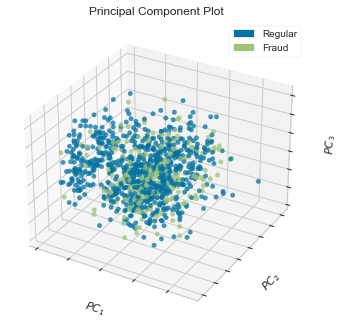

<Axes3DSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [24]:
X.dropna(axis=1, inplace=True)
visualizer = pca(scale=True, projection=3, classes=classes)
visualizer.fit_transform(X,Y.values+1-1)
visualizer.show()


array([[ 1.00894671,  1.31761032],
       [-3.81411398,  0.6712853 ],
       [-1.37546184, -0.85989572],
       ...,
       [-1.00922313,  2.34057424],
       [ 0.61653352, -1.37477456],
       [ 1.87615612,  1.36573241]])

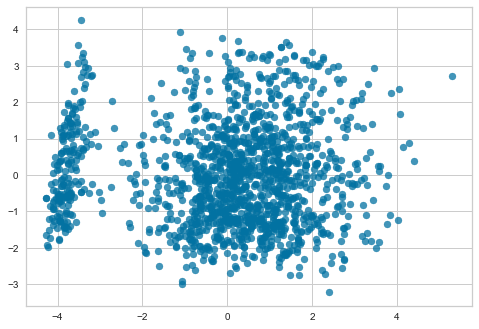

In [25]:
x_up, y_up = SMOTE().fit_resample(X,Y)
pca1 = pca()
X_scaled = pca1.fit_transform(x_up)
index = int (len(X_scaled)*0.7)
X_train = X_scaled[:index]
y_train = Y[:index]
y_test = X_scaled[index:]
X_test = Y[index:]
X_scaled

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [27]:
len(X_test)

300

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [29]:
rfc_Model= RandomForestClassifier()
rfc_Model.fit(X_train, y_train)
y_pred = rfc_Model.predict(X_test)

In [30]:
y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.74      0.98      0.84       222
        True       0.20      0.01      0.02        78

    accuracy                           0.73       300
   macro avg       0.47      0.50      0.43       300
weighted avg       0.60      0.73      0.63       300



In [32]:
sum(y_test == y_pred)/len(y_pred)

0.73